# week 7

### 1.1 다음 코드를 실행해서 데이터 프레임을 생성하세요

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

### 1.2 데이터 프레임을 확인하고, X= calory, breakfast, lunch, dinner, exercise / y=body shape로 변수 분리하세요

In [ ]:
print(df.head(10))
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
y = df[['body_shape']]

  calory breakfast lunch dinner exercise body_shape
0   1200         1     0      0        2     Skinny
1   2800         1     1      1        1     Normal
2   3500         2     2      1        0        Fat
3   1400         0     1      0        3     Skinny
4   5000         2     2      2        0        Fat
5   1300         0     0      1        2     Skinny
6   3000         1     0      1        1     Normal
7   4000         2     2      2        0        Fat
8   2600         0     2      0        0     Normal
9   3000         1     2      1        1        Fat


### 1.3 X 데이터 값의 범위가 균일하지 않으므로 standard scaler를 이용해서 리스케일 해주세요

In [ ]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

### 1.4 사이킷런 PCA 클래스를 이용해서 5차원 데이터를 1차원으로 변환하고 shape를 확인해주세요

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
sklearn_pca_x=pca.fit_transform(x_std)
print(sklearn_pca_x.shape)

(10, 1)


### 1.5 explained_variance_ratio_ 변수를 이용해서 보존된 변동성 비율을 확인해주세요

In [ ]:
print(pca.explained_variance_ratio_)

[0.73183217]


### 1.6 적절한 차원의 수 선택하기 - 원본 데이터셋의 분산을 95%로 유지하는데 필요한 최소한의 PC 개수 즉 차원 수 d를 구하세요

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

2

### 1.7 n_components를 설정하여 PCA를 다시 실행하는 인자로 보존할 분산의 비율을 넣어주세요. (분산의 비율 : 0.95) 이를 X_reduced에 저장하세요 그 후 shape을 통해서 몇차원으로 압축되었는지 확인하세요

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_std)

In [ ]:
X_reduced.shape

(10, 4)

### 1.8 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 다시 원래의 차원으로 되돌리세요 그 후 shape을 통해서 원래의 차원으로 잘 돌아왔는지 확인하세요

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(10, 5)

### 1.9 랜덤 PCA를 이용하여 데이터를 2차원으로 압축하세요. (random_state=42)




In [ ]:
rnd_pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(x_std)

### 1.10 점진적 PCA를 이용하여 데이터를 4차원으로 압축하세요. (배치사이즈:2) 그 후 shape을 통해 확인하세요




In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 2
inc_pca = IncrementalPCA(n_components=4)
for X_batch in np.array_split(x_std, n_batches):
    print(".", end="") 
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(x_std)
X_reduced.shape

..

(10, 4)

### 1.11 커널 PCA를 이용하여 데이터를 2차원으로 압축하세요. (kernel="rbf",gamma=0.4) 그 후 shape을 통해 확인하세요


In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)
X_reduced.shape

(178, 2)

### 1.12 커널 PCA의 하이퍼파라미터를 선택하세요 kPCA를 이용하여 2차원으로 축소하고 Logistic Regression으로 Classification을 진행하세요. 그 다음 가장 높은 accuracy를 얻기 위해 GridSearchCV를사용하여 kPCA에 가장 좋은 커널과 gamma 파라미터를 구하세요.
이때, kpca__kernel은 ["linear", "poly", "rbf", "sigmoid", "cosine"], kpca__gamma"은 np.linspace(0.03, 0.05, 1,2,10)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 1,2,10),
        "kpca__kernel": ["linear", "poly", "rbf", "sigmoid", "cosine"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_std, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': (array([0.03]), nan),
                          'kpca__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                           'cosine']}])

In [ ]:
print(grid_search.best_params_)

{'kpca__gamma': array([0.03]), 'kpca__kernel': 'linear'}


### 2.1 다음 iris 데이터 세트를 출력해주세요

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 2.2 X 데이터 값을 standard scaler를 이용해서 표준화 해주세요

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

### 2.3 PCA를 이용해 4차원 데이터를 2차원으로 변환해주세요

In [ ]:
from sklearn import decomposition 
from sklearn.decomposition import PCA

pca=PCA(n_components=2) 
pca.fit(iris_scaled) 
iris_pca=pca.transform(iris_scaled)

### 2.4 PCA 변환된 데이터의 칼럼 명을 pca_component1, pca_component2로 명명해서 새로운 dataframe을 만들어주세요

In [ ]:
pca_columns=['pca_component1','pca_component2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


### 2.5 원본 데이터와 PCA 데이터를 각각 XGBoost로 학습시키고 (random_state=15), cross_val_score()로 5개의 교차 검증 세트로 정확도를 비교해주세요

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

xgb=XGBClassifier(random_state=15)
scores=cross_val_score(xgb, iris.data, iris.target, scoring='accuracy', cv=5)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.96666667 0.96666667 0.93333333 0.9        1.        ]
원본 데이터 평균 정확도: 0.9533333333333334


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

PCA_X=irisDF_pca[['pca_component1', 'pca_component2']]
scores=cross_val_score(xgb, PCA_X, iris.target, scoring='accuracy', cv=5)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores))

PCA 변환 데이터 교차 검증 개별 정확도: [0.9        0.93333333 0.83333333 0.83333333 1.        ]
PCA 변환 데이터 평균 정확도: 0.9


### 3.1 기본적인 LDA 구현을 위한 라이브러리를 import 해주세요. 와인 데이터도 로드해주세요.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 3.2 X에는 features를 y에는 target을 저장해주세요.

In [ ]:
wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

### 3.3 X의 형태를 확인해주세요. (178,13)이 나와야합니다.

In [ ]:
X.shape

(178, 13)

### 3.4 X의 행 5개를 확인해주세요.

In [ ]:
X.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 3.5 target들의 종류를 확인해주세요.

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 3.6 X_lda에 lda를 fit해주세요.

In [ ]:
lda = LinearDiscriminantAnalysis()

X_lda = lda.fit_transform(X, y)

### 3.7 2차원 평면에 표현해주세요. 교재 395페이지를 참조해주세요.

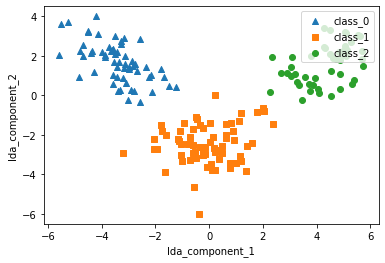

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
wineDF_lda = pd.DataFrame(X_lda, columns=lda_columns)
wineDF_lda['target']=wine.target

markers=['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_1']
  y_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()